***
Welcome! 

In this notebook, we will delve into the practical implementation of our Continuous Bag of Words (CBOW) model on real-world text data, paving the way to train highly effective word vectors. The significance of word vectors lies in their ability to capture semantic relationships between words, enabling us to unlock a deeper understanding of language and its context.
<br>
<br>
We will use multiple concepts learned througout the course such as **Word Vectors, Retrieving data from the Web and the NLTK Library.** 
***

In [1]:
# Importing our libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import wikipedia
import string
import numpy as np
import pandas as pd
import gc

In [2]:
# Run this Code to approximate reproducibility
SEED = 123456
import os
import random as rn
from tensorflow.random import set_seed

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
set_seed(SEED)
rn.seed(SEED)

Let's get data from three wikipedia Articles (`Europe`, `America` and `Africa`):

In [3]:
# We will use the wikipedia library for simplicity
# But you can also try a combination of requests and
# Beautiful Soup

# Keep in mind that the text may change so your results may be a bit
# different
page_europe = wikipedia.page("Europe")
page_america = wikipedia.page("America")
page_africa = wikipedia.page("Africa")

And now, we join all the corpus in a large training base (corpus).

In [4]:
training_base = (
    page_europe.content
    +
    page_america.content
    +
    page_africa.content
)

Note: If you want to replicate exactly what I've done in the lectures, uncomment the line of code below to read a static file with the data (as the wikipedia pages may be edited in the meantime). If you don't, your vectors will be approximately the same but you may have slightly different order in the similarities and word examples.

In [7]:
#with open('./cbow_train/training_base.txt', 'r', encoding='utf-8') as f:
#    training_base = f.read()

We will also remove punctuation for this exercise - let's use the handy `translate` function to do that:

In [8]:
training_base = (
    training_base
    .translate(
        str.maketrans('', '', string.punctuation)
    )
)

In [9]:
len(training_base)

245488

And now, of course.. **tokenization!**

In [10]:
training_tokenized = word_tokenize(training_base.lower())

In [11]:
training_tokenized

['europe',
 'is',
 'a',
 'continent',
 'comprising',
 'the',
 'westernmost',
 'peninsulas',
 'of',
 'eurasia',
 'located',
 'entirely',
 'in',
 'the',
 'northern',
 'hemisphere',
 'and',
 'mostly',
 'in',
 'the',
 'eastern',
 'hemisphere',
 'it',
 'shares',
 'the',
 'continental',
 'landmass',
 'of',
 'afroeurasia',
 'with',
 'both',
 'africa',
 'and',
 'asia',
 'it',
 'is',
 'bordered',
 'by',
 'the',
 'arctic',
 'ocean',
 'to',
 'the',
 'north',
 'the',
 'atlantic',
 'ocean',
 'to',
 'the',
 'west',
 'the',
 'mediterranean',
 'sea',
 'to',
 'the',
 'south',
 'and',
 'asia',
 'to',
 'the',
 'east',
 'europe',
 'is',
 'commonly',
 'considered',
 'to',
 'be',
 'separated',
 'from',
 'asia',
 'by',
 'the',
 'watershed',
 'of',
 'the',
 'ural',
 'mountains',
 'the',
 'ural',
 'river',
 'the',
 'caspian',
 'sea',
 'the',
 'greater',
 'caucasus',
 'the',
 'black',
 'sea',
 'and',
 'the',
 'waterways',
 'of',
 'the',
 'turkish',
 'straitseurope',
 'covers',
 'about',
 '1018',
 'million',
 'k

For this exercise, we'll not remove stop words but feel free to remove them if you want.

Let's build our vocabulary:

In [12]:
vocab = list(
    set(training_tokenized)
)

In [13]:
vocab.sort()

In [14]:
print('We have about {} words in our training base.'.format(len(vocab)))

We have about 5542 words in our training base.


We will build 5.558 different vectors in this exercise.

In [15]:
word_representations = np.identity(len(vocab))

A simple way to generate our one-hot vectors for each word is to use the identity matrix with the size of our vocabulary as we are doing above.

In [16]:
word_representations

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [17]:
vocab_vectors = {}

for index, element in enumerate(vocab):
    vocab_vectors[element] = word_representations[index]

Now we have each word mapped into a vector of len `n` where `n` is the number of words.

In [18]:
vocab_vectors

{'02': array([1., 0., 0., ..., 0., 0., 0.]),
 '0792236955': array([0., 1., 0., ..., 0., 0., 0.]),
 '09': array([0., 0., 1., ..., 0., 0., 0.]),
 '1': array([0., 0., 0., ..., 0., 0., 0.]),
 '10': array([0., 0., 0., ..., 0., 0., 0.]),
 '100': array([0., 0., 0., ..., 0., 0., 0.]),
 '1000': array([0., 0., 0., ..., 0., 0., 0.]),
 '10000': array([0., 0., 0., ..., 0., 0., 0.]),
 '100000': array([0., 0., 0., ..., 0., 0., 0.]),
 '10000–15000': array([0., 0., 0., ..., 0., 0., 0.]),
 '100th': array([0., 0., 0., ..., 0., 0., 0.]),
 '1018': array([0., 0., 0., ..., 0., 0., 0.]),
 '102': array([0., 0., 0., ..., 0., 0., 0.]),
 '103': array([0., 0., 0., ..., 0., 0., 0.]),
 '105': array([0., 0., 0., ..., 0., 0., 0.]),
 '1054': array([0., 0., 0., ..., 0., 0., 0.]),
 '108': array([0., 0., 0., ..., 0., 0., 0.]),
 '1095': array([0., 0., 0., ..., 0., 0., 0.]),
 '10th': array([0., 0., 0., ..., 0., 0., 0.]),
 '10°': array([0., 0., 0., ..., 0., 0., 0.]),
 '11': array([0., 0., 0., ..., 0., 0., 0.]),
 '11000': arr

Now let's create a function that when we given our sentences, it will produce a list of words and context.
<br>
<br>
Why are we building this in another list? Because we will have the same word represented with different context in our sentences. 
<br>
<br>
Another way to do this is to consider the average "context" for a single word - and each word would only be represented once in the training base.

In [19]:
def retrieve_word_neighbors(sentence, neighbors):
    '''
    Retrieves word and neighbor(context) of size
    neighbors into two separate lists.
    
    Arguments:
    - Sentence(str): The sentence to retrieve
    words and context words.
    - Neighbors(int): The size of the window to
    consider context.
    
    Returns:
    - word_keys_sentence(list): Word list;
    - context_words(list): A list with the context
    words for each word of index i
    '''
    word_keys_sentence = []
    context_words = []    
    
    for index, word in enumerate(sentence):
        
        # Build start
        # Build finish
        start = index-neighbors        
        finish = index+neighbors
        
        # Get neighbor words
        neighbor_words = sentence[start:finish+1]
        # Generate context
        word_context = (
            neighbor_words[:neighbors]
            +
            neighbor_words[neighbors+1:]
        )
        
        # We only append the context if we have enough 
        # neighbors
        if len(word_context) >= neighbors*2:
            word_keys_sentence.append(word)
            context_words.append(word_context)
            
    return word_keys_sentence, context_words

Let's see two examples of word and context using 3 neighbors:

In [20]:
retrieve_word_neighbors(training_tokenized, 3)[0][542]

'the'

For the word 'peninsula' in this sentence, the context is:

In [21]:
retrieve_word_neighbors(training_tokenized, 3)[1][542]

['states', 'led', 'to', 'formation', 'of', 'the']

Makes sense as the context and the word would form the sentence:
    - `states led to the formation of the`

Another example:

In [22]:
retrieve_word_neighbors(training_tokenized, 3)[0][1]

'comprising'

In [23]:
retrieve_word_neighbors(training_tokenized, 3)[1][1]

['is', 'a', 'continent', 'the', 'westernmost', 'peninsulas']

Let's save the entire data into two objects:

In [24]:
word_keys, context_window = retrieve_word_neighbors(training_tokenized, 3)

More examples of word and context:

In [25]:
word_keys[1000]

'to'

In [26]:
context_window[1000]

['iceland', 'is', 'considered', 'be', 'part', 'of']

In [27]:
word_keys[200]

'further'

In [28]:
context_window[200]

['america', 'is', 'severe', 'from', 'the', 'sea']

The length of our `word_keys` and `context_window` must be the same:

In [29]:
print(len(word_keys))
print(len(context_window))

39016
39016


Let's now build our features and our target variable. Remember that in our training base, the same word is repeated multiple times. You can also try to average the training vectors for the same word during the training, as an alternative.

NOTE: If your computer has some trouble running the line below, try one of the following:
- Importing the library gc with `import gc` and run `gc.collect()`
- Try to run the notebook with less articles (taking out one of the continent pages from the training base).

In [30]:
train_word_size = len(word_keys)
vocab_size = len(vocab)

y = np.zeros([train_word_size, vocab_size])
X = np.zeros([train_word_size, vocab_size])

Let's build the prediction and target vectors - we will use three neighbors on each side of the word, a window of 6:

In [31]:
neighbors = 3
for index, word in enumerate(word_keys):
    y[index,:] = vocab_vectors[word]
    aux_array = np.zeros([1, vocab_size])
    
    for neighbour in context_window[index]:
        aux_array = aux_array+vocab_vectors[neighbour]
    
    X[index,:] = (aux_array/(neighbors*2))[0]

And now we will train our Neural Network:

In [32]:
from keras.models import Sequential
from keras.layers import Dense

We can also build a large hidden layer (our word vectors will be larger). Here we are setting our vector layers to shape 40:

In [33]:
model = Sequential()
model.add(Dense(40, input_dim=vocab_size, activation='relu'))
model.add(Dense(vocab_size, input_dim=40, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

The fit process will take a bit to run - let's use validation split to check the accuracy of the algorithm in a holdout set:

In [34]:
model.fit(
    X, 
    y, 
    epochs=100, 
    batch_size=100,
    validation_split=0.2
)

Epoch 1/100
313/313 [==============================] - 10s 29ms/step - loss: 7.5219 - accuracy: 0.0943 - val_loss: 6.8848 - val_accuracy: 0.0851
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 6.6818 - accuracy: 0.0973 - val_loss: 6.8263 - val_accuracy: 0.0851
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 6.6238 - accuracy: 0.0973 - val_loss: 6.7918 - val_accuracy: 0.0851
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 6.5901 - accuracy: 0.0973 - val_loss: 6.7625 - val_accuracy: 0.0851
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 6.5641 - accuracy: 0.0973 - val_loss: 6.7411 - val_accuracy: 0.0851
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 6.5387 - accuracy: 0.0973 - val_loss: 6.7153 - val_accuracy: 0.0853
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 6.5098 - accuracy: 0.1002 - val_loss: 6.6848 - val_accuracy

313/313 [==============================] - 10s 31ms/step - loss: 2.4166 - accuracy: 0.5306 - val_loss: 2.5973 - val_accuracy: 0.4950
Epoch 58/100
313/313 [==============================] - 10s 32ms/step - loss: 2.3597 - accuracy: 0.5404 - val_loss: 2.5360 - val_accuracy: 0.5090
Epoch 59/100
313/313 [==============================] - 9s 29ms/step - loss: 2.3045 - accuracy: 0.5508 - val_loss: 2.4756 - val_accuracy: 0.5181
Epoch 60/100
313/313 [==============================] - 9s 29ms/step - loss: 2.2517 - accuracy: 0.5603 - val_loss: 2.4187 - val_accuracy: 0.5274
Epoch 61/100
313/313 [==============================] - 10s 31ms/step - loss: 2.2003 - accuracy: 0.5690 - val_loss: 2.3604 - val_accuracy: 0.5373
Epoch 62/100
313/313 [==============================] - 9s 29ms/step - loss: 2.1508 - accuracy: 0.5779 - val_loss: 2.3079 - val_accuracy: 0.5474
Epoch 63/100
313/313 [==============================] - 8s 27ms/step - loss: 2.1025 - accuracy: 0.5870 - val_loss: 2.2563 - val_accuracy: 0.

Let's check the predictions of our neural network model and how it is predicting a center word from a context:

In [35]:
prediction_test = model.predict(X)

1220/1220 [==============================] - 8s 6ms/step


In [36]:
# Turning our predictions into one-hot vectors
for index, element in enumerate(prediction_test):
    predicted = element.argmax()
    prediction_test[index,:] = 0 
    prediction_test[index, predicted] = 1

In [37]:
len(prediction_test)

39016

Let's check the `accuracy` for our model - how many words did we got right?

In [38]:
prediction_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
accuracy_score(y, prediction_test)

0.824559155218372

Great! We have around 82% of accuracy (your results may be slightly different after running the code, but you should have something around this balue) - this is a nice result.
<br>
<br>
Let's visualize some predictions:

In [40]:
def print_prediction(context, index, prediction_vector):
    
    context_index = context[index]
    
    print('For sentence: '+' '.join(context_index[0:2])+' '+' '.join(context_index[2:]))
    predicted_word = prediction_vector[index]
    
    for index_word, array in enumerate(vocab_vectors.values()):
        if np.array_equal(predicted_word, array):
            word = vocab[index_word]
    print('The predicted word is {}'.format(word))

In [41]:
print_prediction(context_window, 2424, prediction_test)

For sentence: and subsequently was as a natural
The predicted word is proposed


For the context `and subsequently was as a natural` the predicted word is `proposed` which is indeed correct!

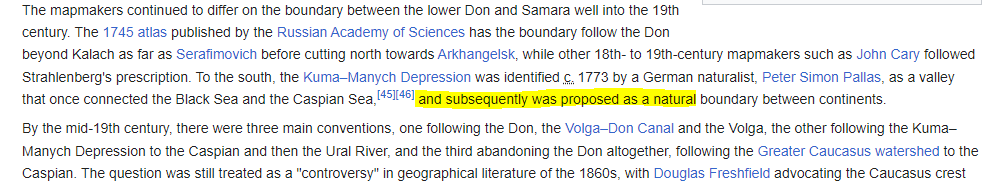

Let's retrieve our stored **word embeddings**:

In [42]:
embeddings = [layer.get_weights() for layer in model.layers]

In [43]:
embeddings_layer = embeddings[0][0]
embeddings_layer_2 = embeddings[1][0]

In [44]:
embeddings_layer_2.T.shape

(5542, 40)

In [45]:
word_embeddings = (embeddings_layer_2.T+embeddings_layer)/2

And producing similarities between vectors based on cosine distance:

In [46]:
word_embeddings = pd.DataFrame(word_embeddings, index=vocab)

In [47]:
word_embeddings_sim = pd.DataFrame(
    cosine_similarity(word_embeddings),
    columns=vocab,
    index=vocab
)

In [48]:
def get_most_and_least_similar_words(word):
    return (
        word_embeddings_sim[word].sort_values(ascending=False).head(15),
        word_embeddings_sim[word].sort_values(ascending=False).tail(15)
    )

Finally, let's check some the most similar and dissimilar words for certain tokens:

In [49]:
get_most_and_least_similar_words('english')

(english          1.000000
 taiwan           0.655746
 conservation     0.649604
 tend             0.625122
 fish             0.613013
 notes            0.603983
 aurelius         0.583255
 persistent       0.580640
 disaster         0.578070
 aggressionthe    0.575685
 academics        0.574194
 voluntary        0.563870
 dissenting       0.553264
 summer           0.553158
 politics         0.549910
 Name: english, dtype: float32,
 volgo–uralia   -0.394691
 conception     -0.402023
 flowering      -0.408938
 minoan         -0.415398
 exceeded       -0.419026
 ended          -0.420719
 1859           -0.424786
 last           -0.425434
 advent         -0.431417
 debtor         -0.454909
 tributary      -0.456984
 c              -0.457742
 nationstate    -0.464720
 revolutions    -0.465547
 middle         -0.486944
 Name: english, dtype: float32)

Interesting results! Let's see more examples:

In [50]:
get_most_and_least_similar_words('mexico')

(mexico       1.000000
 canada       0.763269
 gulf         0.640203
 florida      0.567378
 ahead        0.513460
 deep         0.490093
 cohost       0.475705
 soar         0.459655
 north        0.455551
 wall         0.455266
 including    0.454121
 drama        0.453594
 stream       0.447735
 australia    0.446684
 euripides    0.438485
 Name: mexico, dtype: float32,
 treated             -0.543635
 gun                 -0.544643
 preindoeuropean     -0.544774
 15–24               -0.549325
 1773                -0.554166
 czechoslovakia      -0.554463
 innovators          -0.556032
 week                -0.556416
 legal               -0.558643
 banjos              -0.559174
 governmentmanaged   -0.567496
 stolen              -0.586974
 abundant            -0.589755
 framework           -0.592690
 grittier            -0.616235
 Name: mexico, dtype: float32)

Our vectors are really good! Even with a small portion of text we were able to get interesting vectors from our data.

In [51]:
get_most_and_least_similar_words('government')

(government    1.000000
 federal       0.757090
 portal        0.671874
 rulings       0.666353
 laws—such     0.640831
 trials        0.624770
 gateway       0.622678
 leave         0.615174
 preference    0.608630
 internet      0.583199
 handle        0.580421
 owns          0.569695
 courts        0.568714
 official      0.557293
 personal      0.551952
 Name: government, dtype: float32,
 latter         -0.366525
 settlements    -0.368192
 southeastthe   -0.369948
 primarily      -0.374022
 empire         -0.376410
 civilisation   -0.385847
 healed         -0.388120
 usled          -0.388677
 mississippi    -0.392449
 exist          -0.398189
 continued      -0.400419
 holy           -0.402559
 rule           -0.434600
 476            -0.435557
 southeast      -0.481227
 Name: government, dtype: float32)

In [52]:
get_most_and_least_similar_words('lincoln')

(lincoln         1.000000
 abraham         0.758931
 find            0.672656
 woodrow         0.635117
 singleparent    0.623128
 read            0.621672
 heat            0.619258
 presidential    0.614039
 °c              0.611270
 ronald          0.601830
 oneparty        0.598059
 14              0.595020
 764             0.594337
 voltaire        0.587351
 election        0.586178
 Name: lincoln, dtype: float32,
 withdrew       -0.316425
 council        -0.317539
 shores         -0.321544
 volga–don      -0.324048
 fennoscandia   -0.324949
 azov           -0.335647
 italy          -0.349212
 hollywood      -0.350629
 lawrence       -0.355115
 province       -0.356155
 1920s          -0.361101
 citystate      -0.365001
 oldest         -0.376268
 seized         -0.387318
 invention      -0.396284
 Name: lincoln, dtype: float32)

In [53]:
get_most_and_least_similar_words('clergy')

(clergy           1.000000
 popes            0.830091
 defined          0.802482
 medieval         0.782889
 14th             0.739219
 urals            0.728091
 10th             0.722163
 saint            0.697796
 anaximander      0.694677
 eec              0.691106
 archimedes       0.686953
 eastwest         0.672920
 1871             0.666604
 reconstructed    0.666034
 nasdaq           0.664382
 Name: clergy, dtype: float32,
 immigrants     -0.330376
 americans      -0.336375
 less           -0.341860
 contributing   -0.343398
 2014           -0.343599
 prior          -0.352580
 weighted       -0.358615
 them           -0.358997
 41             -0.359410
 account        -0.374654
 federal        -0.397921
 tribal         -0.410335
 2017           -0.425718
 members        -0.429542
 23             -0.463419
 Name: clergy, dtype: float32)

In [54]:
get_most_and_least_similar_words('science')

(science            1.000000
 houston            0.660186
 pharmaceuticals    0.611034
 substance          0.603476
 kidney             0.592302
 disease            0.588344
 facilities         0.585900
 atrisk             0.580657
 renewable          0.578428
 ground             0.574754
 kartvelian         0.570978
 whitney            0.567995
 fighting           0.567079
 neck               0.561796
 tatar              0.560566
 Name: science, dtype: float32,
 wayback        -0.426227
 pioneer        -0.436100
 size           -0.436103
 promoted       -0.447174
 protected      -0.450758
 tesla          -0.453460
 standard       -0.453757
 dollar         -0.454855
 2021wealth     -0.457510
 unto           -0.460882
 applications   -0.464829
 gdp            -0.471993
 member         -0.479346
 republic       -0.485584
 alone—a        -0.495949
 Name: science, dtype: float32)

In [55]:
get_most_and_least_similar_words('racism')

(racism         1.000000
 systemic       0.869032
 confront       0.854566
 luther         0.775047
 brutality      0.745990
 obrien         0.744559
 martin         0.744522
 theologian     0.741933
 nailed         0.733514
 lingering      0.728311
 palmer         0.685172
 nonviolence    0.681832
 police         0.678041
 vol            0.658858
 cengage        0.649839
 Name: racism, dtype: float32,
 creation     -0.314366
 ussrs        -0.319992
 1877         -0.320041
 overall      -0.325441
 abolition    -0.326929
 grasslands   -0.333210
 density      -0.333354
 9th          -0.334955
 weeks        -0.336628
 tide         -0.347255
 share        -0.356720
 council      -0.357315
 1315–1317    -0.402845
 fall         -0.407789
 rest         -0.411821
 Name: racism, dtype: float32)

In [56]:
get_most_and_least_similar_words('great')

(great          1.000000
 fitzgeralds    0.712267
 imminent       0.686916
 awakening      0.685613
 988            0.678357
 basin          0.676252
 souththe       0.666834
 scott          0.665801
 vladimir       0.650335
 crises         0.644881
 1919           0.637366
 seemed         0.634942
 lakes          0.634144
 worker         0.630582
 ivan           0.620730
 Name: great, dtype: float32,
 enforced       -0.298622
 bordered       -0.300464
 pentagon       -0.311517
 nontwo         -0.311555
 conservation   -0.319208
 size           -0.319487
 market         -0.328278
 members        -0.342297
 dc             -0.347429
 park           -0.349179
 ceded          -0.364332
 land           -0.369159
 humans         -0.372252
 service        -0.393704
 only           -0.407608
 Name: great, dtype: float32)

Some word vectors extracted will always have an influence from the text where they were trained on. For example, `apple` embedding will have more similarity with the company `Apple` than the `apple` fruit:

In [57]:
get_most_and_least_similar_words('apple')

(apple                   1.000000
 att                     0.809810
 disney                  0.783329
 paramount               0.780704
 producerentrepreneur    0.777426
 pie                     0.771924
 cocacola                0.768472
 christianlatin          0.759270
 pasta                   0.731208
 quattrocento            0.710071
 implement               0.706167
 users                   0.698549
 scholars                0.684450
 cultivating             0.674072
 chicken                 0.665142
 Name: apple, dtype: float32,
 16th         -0.320918
 korean       -0.323751
 ensuing      -0.327592
 war          -0.330162
 2003–2011    -0.333185
 vietnam      -0.335616
 disasters    -0.336332
 join         -0.338371
 network      -0.351413
 across       -0.363575
 populous     -0.370015
 napoleonic   -0.372506
 ii           -0.417646
 1949         -0.425555
 sport        -0.462678
 Name: apple, dtype: float32)

For such a small training base, it's normal that the least similar words are less meaningful than the most similar.

As a challenge, can you try to produce word vectors with `stop words` and see the result?

As we have seen in this notebook, word vectors are very powerful, even when trained on few sentences and a small corpus. Next we will see an implementation of Word2Vec in Python that was already pre-trained on millions of words!